In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('weatherHistory.csv')

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df['Summary'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Partly Cloudy
1        Partly Cloudy
2        Mostly Cloudy
3        Partly Cloudy
4        Mostly Cloudy
             ...      
96448    Partly Cloudy
96449    Partly Cloudy
96450    Partly Cloudy
96451    Partly Cloudy
96452    Partly Cloudy
Name: Summary, Length: 96453, dtype: object>

In [6]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [7]:
df.drop(columns=['Formatted Date','Daily Summary'],inplace=True)

In [8]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [9]:
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(95936, 10)

In [12]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [13]:
target=df['Summary']

In [14]:
df.drop(columns='Summary',inplace=True)

In [16]:
data_dummies=pd.get_dummies(df)

In [18]:
data_dummies.shape

(95936, 10)

In [19]:
data_dummies.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,1,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,1,0


In [20]:
from sklearn.utils import shuffle
df_shuffled=shuffle(data_dummies,random_state=49)

In [25]:
DV='Temperature (C)'

In [30]:
Y=df_shuffled[DV]
X=df_shuffled.drop(DV,axis=1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3)

In [34]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [36]:
model.fit(X_train[['Humidity']],Y_train)

LinearRegression()

In [37]:
intercept = model.intercept_

In [38]:
print(intercept)

34.65627060185207


In [40]:
print(model.coef_)

[-30.9242799]


In [47]:
pred=model.predict(X_test[['Humidity']])

In [49]:
print(pred)

[10.22608948  7.13366149 11.46306068 ... 12.70003187  3.7319907
 15.48321706]


Text(0.5, 1.0, 'Actual value Vs predicted value (r = 0.63)')

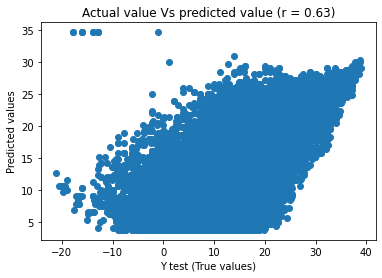

In [54]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter(Y_test,pred)
plt.xlabel('Y test (True values)')
plt.ylabel('Predicted values')
plt.title('Actual value Vs predicted value (r = {0:0.2f})'.format(pearsonr(Y_test,pred)[0],2))


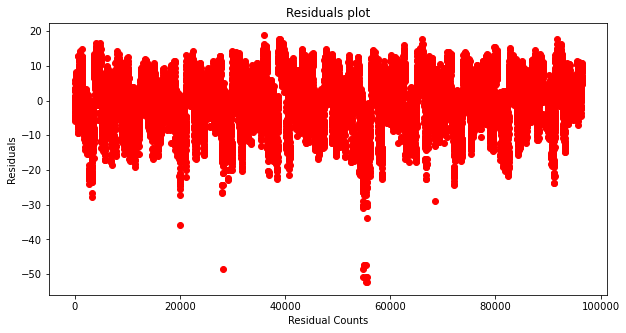

In [56]:
plt.figure(figsize=(10,5))
plt.plot((Y_test - pred),'o',color="red")
plt.xlabel('Residual Counts')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.show()
